In [96]:

from pprint import pprint
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [97]:
import numpy as np
import pandas as pd

In [103]:
import datetime as dt
from datetime import timedelta as td
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [105]:
year_start = dt.date(2016, 8, 23)
year_end = dt.date(2017, 8, 23)

# Perform a query to retrieve the date and precipitation scores

prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_start).\
    filter(Measurement.date <= year_end).\
    all()
prcp_data[0][0]

date_convert = datetime.strptime(prcp_data[0][0], '%Y-%m-%d').date()
date_convert
year_start = dt.date(2016, 8, 23)
year_start

datetime.date(2016, 8, 23)

In [33]:
year_start = dt.date(2016, 8, 23)
year_end = dt.date(2017, 8, 23)

# Perform a query to retrieve the date and precipitation scores

prcp_data = session.query(Measurement.date, func.sum(Measurement.prcp)).\
    filter(Measurement.date >= year_start).\
    filter(Measurement.date <= year_end).\
    group_by(Measurement.date).\
    all()
prcp_data

date = []
total_prcp = []

for i in range(len(prcp_data)):
    date.append(prcp_data[i][0])
    total_prcp.append(prcp_data[i][1])
                
date

df = pd.DataFrame({
    'Date': date,
    'Total Precipitation': total_prcp
})


df = df.set_index('Date')
df = df.sort_values(by=['Date'])
df.head()

,Total Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32


C:\Users\andyj\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


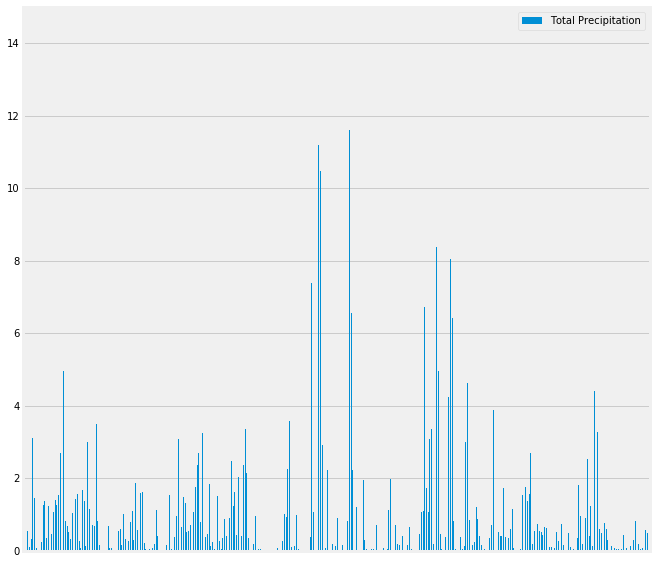

In [34]:
df.plot(kind='bar', figsize=(10,10))
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

# Rotate the xticks for the dates

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Total Precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


In [36]:
# What are the most active stations?
# List the stations and the counts in descending order.

#session.query(Station.station).distinct()

session.query(Measurement.station, func.count(Measurement.station).label('station_count')).\
    group_by(Measurement.station).\
    order_by('station_count DESC').\
    all()

C:\Users\andyj\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'station_count DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
most_active_station = session.query(Measurement.station, func.count(Measurement.station).label('station_count')).\
    group_by(Measurement.station).\
    order_by('station_count DESC').\
    first()
most_active_station = most_active_station[0]
most_active_station

C:\Users\andyj\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'station_count DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


'USC00519281'

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).\
    all()

session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).\
    all()

session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).\
    all()




[('USC00519281', 71.66378066378067)]

In [46]:
# Choose the station with the highest number of temperature observations.

highest_tobs = session.query(Measurement.station, func.count(Measurement.tobs).label('temp_count')).\
    order_by('temp_count desc').\
    group_by(Measurement.station).\
    first()
highest_tobs[0]

C:\Users\andyj\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'temp_count desc'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


'USC00519281'

In [81]:
# Query the last 12 months of temperature observation data for this station

tobs_freq = session.query(Measurement.tobs).\
    filter(Measurement.date >= year_start).\
    filter(Measurement.date <= year_end).\
    filter(Measurement.station == highest_tobs[0]).\
    all()
tobs_freq
tobs_freq_array = []

for i in range(len(tobs_freq)):
    tobs_freq_array.append(tobs_freq[i][0])

tobs_freq_array




[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

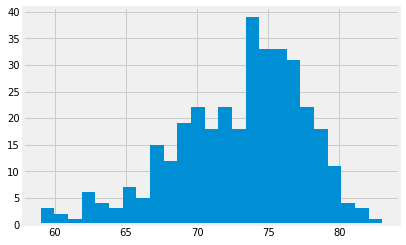

In [83]:
#plot the results as a histogram

num_bins = len(set(tobs_freq))
fig, ax = plt.subplots()
n, bins, patches = ax.hist(tobs_freq_array, num_bins)

In [86]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [87]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-02-28', '2017-03-05'))
calc_temps_plot = np.array(calc_temps('2016-02-28', '2017-03-05'))

[(59.0, 74.11674478057094, 84.0)]


C:\Users\andyj\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


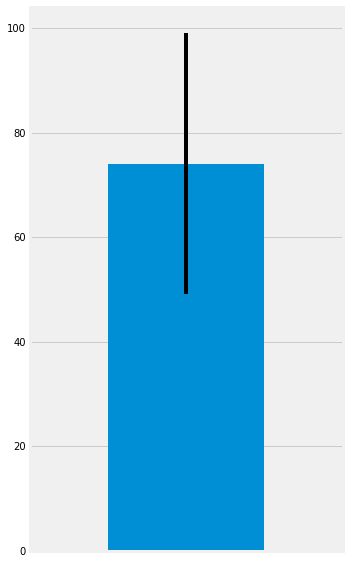

In [92]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


yerr = calc_temps_plot[0][2] - calc_temps_plot[0][0]
#calc_temps_x = np.arange(1)
#calc_temps_x
#fig = plt.bar(0,calc_temps_plot[0][1], yerr=yerr)
#plt.show()
ctp_df = pd.DataFrame(calc_temps_plot, columns=['min','avg','max'])
ctp_df['avg'].plot(kind='bar', yerr=yerr, figsize=(5,10))
ax2 = plt.axes()
x_axis2 = ax2.axes.get_xaxis()
x_axis2.set_visible(False)


In [93]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Station.name, func.sum(Measurement.prcp).label('prcp_sum'), Station.latitude, Station.longitude, Station.elevation]
same_id = session.query(*sel).filter(Measurement.station == Station.station).\
    filter(Measurement.date >= year_start).\
    filter(Measurement.date <= year_end).\
    group_by(Station.name).\
    order_by('prcp_sum desc').\
    all()

same_id

prcp_df = pd.DataFrame(same_id)
prcp_df.set_index('name')


C:\Users\andyj\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'prcp_sum desc'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


,prcp_sum,latitude,longitude,elevation
name,,,,
"MANOA LYON ARBO 785.2, HI US",147.81,21.33310,-157.80250,152.4
"WAIHEE 837.5, HI US",70.03,21.45167,-157.84889,32.9
"KANEOHE 838.1, HI US",48.51,21.42340,-157.80150,14.6
"WAIMANALO EXPERIMENTAL FARM, HI US",38.01,21.33556,-157.71139,19.5
"KUALOA RANCH HEADQUARTERS 886.9, HI US",33.24,21.52130,-157.83740,7.0
"WAIKIKI 717.2, HI US",16.09,21.27160,-157.81680,3.0
"PEARL CITY, HI US",4.59,21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [94]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [100]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

trip_start = dt.date(2016, 9, 23)
trip_end = dt.date(2016, 9, 29)


# Use the start and end date to create a range of dates

delta = trip_end - trip_start
delta

trip_range = []

for i in range(delta.days + 1):
    trip_range.append((trip_start + timedelta(i)).strftime('%m-%d'))
    
trip_range

# Strip off the year and save a list of %m-%d strings


# Loop through the list of %m-%d strings and calculate the normals for each date



for i in trip_range:
    print(daily_normals(i))
    

daily_normals(trip_range[0])


TypeError: 'datetime.timedelta' object is not callable

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

daily_min = []
daily_avg = []
daily_max = []

for i in range(len(trip_range)):
    for j in trip_range[i][0]:
        daily_min.append(daily_normals(trip_range[i])[0][0])
        daily_avg.append(daily_normals(trip_range[i])[0][1])
        daily_max.append(daily_normals(trip_range[i])[0][2])
        
daily_df = pd.DataFrame({
    'Daily Min': daily_min,
    'Daily Avg': daily_avg,
    'Daily Max': daily_max,
    'Date': trip_range
})

daily_df = daily_df.set_index('Date')
daily_df
        


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

x_values = list(daily_df.index.values)

#daily_df.plot(x_values, [daily_df['Daily Min'],daily_df['Daily Avg']], kind='bar')

#daily_df.plot(kind='bar')
daily_df

In [ ]:
for i in range(len(trip_range)):
    print(i)